In [6]:
import imageio
import numpy as np
import math
from matplotlib import pyplot as plt

In [1]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 404A-07E2

 Directory of C:\Users\Admin\OneDrive\Documents\Code\ComputationalBiophysics

09/06/2018  09:07 AM    <DIR>          .
09/06/2018  09:07 AM    <DIR>          ..
09/04/2018  10:45 PM    <DIR>          .git
09/06/2018  09:06 AM    <DIR>          .ipynb_checkpoints
02/22/2018  02:58 PM               299 3dplot.py
04/06/2018  03:59 PM             2,609 cylinder_plot.m
09/03/2018  11:15 PM        79,385,428 cylinder_plot_with_Initial.gif
06/13/2018  08:46 PM         3,078,312 depolymerization_statistics.txt
09/01/2018  10:33 AM         1,692,667 diffusion_statistics.ipynb
08/18/2018  08:01 AM         9,867,943 diffusion_statistics.txt
04/06/2018  03:59 PM             3,876 fancy_plot.m
04/06/2018  03:59 PM                71 Feb
04/06/2018  03:59 PM               466 Filter.m
03/11/2018  01:21 PM         1,798,037 fragmentation_statistics.txt
04/06/2018  03:59 PM            26,872 ftsZ.jpg
09/06/2018  09:07 AM        64,327

In [88]:
big_table={}
filename='FtsZ_locations.txt'
file=open(filename,'r')
data=file.readline()
while data:
    datas=data.split()
    for index in range(0,len(datas),3):
        key=datas[index]
        if key in big_table:
            big_table[key].append((datas[index+1],datas[index+2]))
        else:
            big_table[key]=[]
            big_table[key].append((datas[index+1],datas[index+2]))
    data=file.readline()
file.close()

In [14]:
big_table.keys()

dict_keys(['25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', 

In [89]:
table_length={}
for key in list(big_table.keys()):
    table_length[key]=len(big_table[key])

In [90]:
sorted_table_ID=list(sorted(table_length,reverse=True,key=table_length.__getitem__))

In [206]:
end_time=60
FtsZ_location=[]
index=0
ID=sorted_table_ID[index]
while table_length[ID]>end_time*100:
#     print(table_length[ID])
    FtsZ_location.append(big_table[ID])
    index+=1
    ID=sorted_table_ID[index]
# for ID in sorted_table_ID[0:1000]:
#     print(table_length[ID])
#     if table_length[ID]>end_time*100
#     FtsZ_location.append(big_table[ID])
index

41

In [10]:

for index,FtsZ in enumerate(FtsZ_location):
    image=np.ones((600,563))
    for location in FtsZ:
        image[int(location[0])][int(location[1])]=0
    imageio.imwrite('test'+str(index)+'.jpg',image)

In [87]:
len(FtsZ_location)

24

In [184]:

distances=[0]*end_time
error_bar=[0]*end_time
for i in range(1,end_time):
    distance_sum=[]
#     counter=0
    for j in range(0,end_time,i):
              
        
        for FtsZ in FtsZ_location:
            if j*100+i*100<end_time*100:
                initial=FtsZ[j*100]
                final=FtsZ[j*100+i*100]
                distance=(((int(final[0])-int(initial[0]))*5*10**(-3))**2+((int(final[1])-int(initial[1]))*5*10**(-3))**2)
                distance_sum.append(distance)
#                 counter+=1
    distance_sum=np.array(distance_sum,dtype='float')
    distances[i]=np.mean(distance_sum)
    error_bar[i]=np.std(distance_sum)
# distances=np.array(distances,dtype='float')
# error_bar=np.array(error_bar,dtype='float')


In [207]:

distances_aggr=[]
distances=[0]*end_time
error_bar=[0]*end_time
for i in range(1,end_time):
    distance_sum=[]
#     counter=0
    for j in range(0,end_time,i):
              
        
        for FtsZ in FtsZ_location:
            if j*100+i*100<end_time*100:
                initial=FtsZ[j*100]
                final=FtsZ[j*100+i*100]
                distance=(((int(final[0])-int(initial[0]))*5*10**(-3))**2+((int(final[1])-int(initial[1]))*5*10**(-3))**2)
                if distance<=i*0.2:
                    distance_sum.append(distance)
#                 counter+=1
    print(np.max(distance_sum))
#     print(np.mean(distance_sum))
#     if np.max(distance_sum)
    distances_aggr.append(distance_sum)
    distances[i]=np.mean(distance_sum)
    error_bar[i]=np.std(distance_sum)
#     distances[i]=np.mean(distance_sum)
#     error_bar[i]=np.std(distance_sum)
# distances=np.array(distances,dtype='float')
# error_bar=np.array(error_bar,dtype='float')


0.059199999999999996
0.093125
0.11902500000000002
0.1217
0.261025
0.20372500000000002
0.373
0.19889999999999997
0.29712500000000003
0.31370000000000003
0.4673000000000001
0.5329999999999999
0.5777
0.6570000000000001
0.6547250000000001
0.39085
0.5292250000000001
0.6773000000000001
0.81665
0.71045
0.6774500000000001
0.9724999999999999
0.7142499999999999
0.7834500000000001
4.788625000000001
0.8744500000000002
0.8838250000000002
4.8042
4.957025000000001
1.123825
1.020325
1.000225
1.020325
1.123825
1.40445
1.19925
1.2323250000000001
6.891025
1.102725
1.0714499999999998
1.0508499999999998
1.1344499999999997
6.7864249999999995
1.3227250000000002
1.2771250000000003
1.3227250000000002
1.42825
1.4163249999999998
6.68245
6.0764499999999995
5.6648
5.452624999999999
6.175624999999999
6.225425
6.126025
6.300500000000001
6.812499999999999
3.9070250000000004
6.78665


In [160]:
len(FtsZ_location)

490

In [151]:
len(distances[1])

6860

In [152]:
len(distances[10])

980

In [158]:
np.max(distances[1])

8.850650000000002

In [159]:
np.max(distances[28])

7.7562500000000005

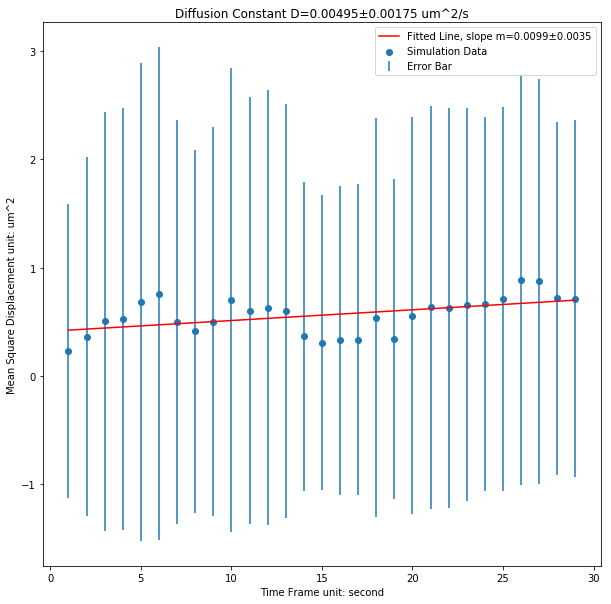

In [140]:
fig=plt.figure(figsize=[10,10])
ax = fig.add_subplot(111)
plt.scatter(range(1,end_time),distances[1:end_time],label='Simulation Data')
plt.errorbar(range(1,end_time),distances[1:end_time],yerr=error_bar[1:end_time],fmt='none',label='Error Bar')
(m, b),V= np.polyfit(range(1,end_time),distances[1:end_time],1,cov=True)
plt.plot(range(1,end_time), b + m * np.floor(range(1,end_time)), '-',color='red',label='Fitted Line, slope m='+str(round(m,5))+'±'+str(round(np.sqrt(V[0][0]),5)))
plt.xlabel('Time Frame unit: second')
plt.ylabel('Mean Square Displacement unit: um^2')
plt.title('Diffusion Constant D='+str(round(m/2,5))+'±'+str(round(np.sqrt(V[0][0])/2,5))+' um^2/s')
plt.legend()
# ax.annotate(,xy=(15,3),xytext=(15,3))

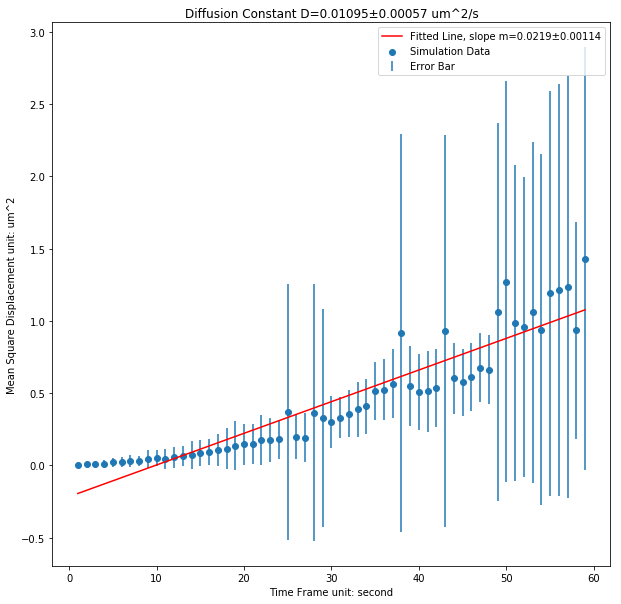

In [209]:
fig=plt.figure(figsize=[10,10])
ax = fig.add_subplot(111)
plt.scatter(range(1,end_time),distances[1:end_time],label='Simulation Data')
plt.errorbar(range(1,end_time),distances[1:end_time],yerr=error_bar[1:end_time],fmt='none',label='Error Bar')
(m, b),V= np.polyfit(range(1,end_time),distances[1:end_time],1,cov=True)
plt.plot(range(1,end_time), b + m * np.floor(range(1,end_time)), '-',color='red',label='Fitted Line, slope m='+str(round(m,5))+'±'+str(round(np.sqrt(V[0][0]),5)))
plt.xlabel('Time Frame unit: second')
plt.ylabel('Mean Square Displacement unit: um^2')
plt.title('Diffusion Constant D='+str(round(m/2,5))+'±'+str(round(np.sqrt(V[0][0])/2,5))+' um^2/s')
plt.legend()

# ax.annotate(,xy=(15,3),xytext=(15,3))

In [180]:
labels=[]
for i in range(0,end_time):
    labels.append(str(i))

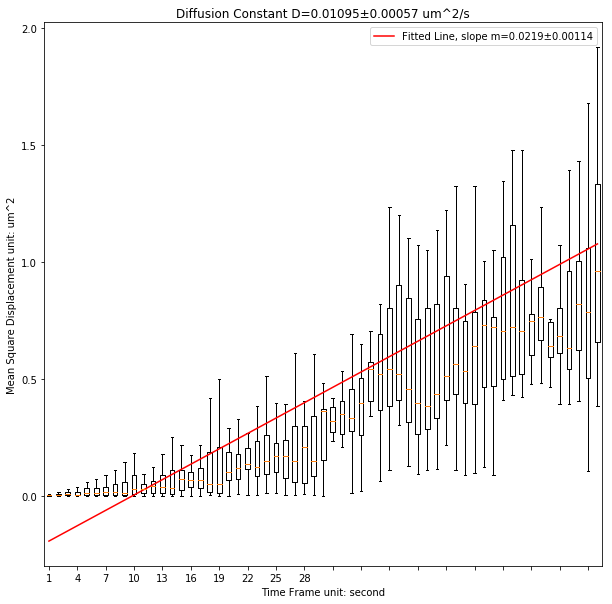

In [208]:
fig=plt.figure(figsize=[10,10])
plt.boxplot(distances_aggr,showfliers=False)
(m, b),V= np.polyfit(range(1,end_time),distances[1:end_time],1,cov=True)
plt.plot(range(1,end_time), b + m * np.floor(range(1,end_time)), '-',color='red',label='Fitted Line, slope m='+str(round(m,5))+'±'+str(round(np.sqrt(V[0][0]),5)))

plt.xticks(range(1,end_time,3),labels[1:end_time:3])
plt.xlabel('Time Frame unit: second')
plt.ylabel('Mean Square Displacement unit: um^2')
plt.legend()
plt.title('Diffusion Constant D='+str(round(m/2,5))+'±'+str(round(np.sqrt(V[0][0])/2,5))+' um^2/s')
plt.show()

In [148]:
np.max(distances,axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [135]:
np.sqrt(V[0][0])

0.003503152083577627

In [58]:
len(error_bar)

64

In [60]:
len(distances)

64

In [101]:
m/2

0.004950591629096862

In [61]:
velocity=velocity/64.03

In [63]:
velocity=velocity*5*10**(-9)

In [67]:
velocity

array([7.89658649e-09, 7.89658649e-09, 1.99920020e-08, 1.28074492e-08,
       1.28074492e-08, 1.28074492e-08, 1.09368367e-08, 1.38236313e-08,
       1.28848220e-08, 1.31971700e-08, 1.28848220e-08, 1.28848220e-08,
       1.22601269e-08, 1.49167233e-08, 1.61015546e-08, 1.61015546e-08,
       1.48376172e-08, 1.48376172e-08, 1.46033652e-08, 1.47589134e-08,
       1.47336891e-08, 1.47336891e-08, 1.47336891e-08, 3.99840040e-08])